# 逻辑回归与多层感知机

## 逻辑回归简介与数据预处理 

##### 逻辑回归本质是分类，它用一个sigmoid函数将连续的变量映射到一个概率空间，即0,1之间

对于分类问题,最好的使用交叉熵损失函数会更有效,交叉熵会输出一个更大的损失

交叉熵损失函数:  
交叉熵刻画的是实际输出(概率)与期望输出(概率)的距离,也就是交叉熵的值越小,  
两个概率分布就越近。假设概率分布p为期望输出,概率分布q为实际输出,
H(p,q)为交叉熵,则:   
$$H(p,q) = -\sum_xp(x)\log q(x)$$  
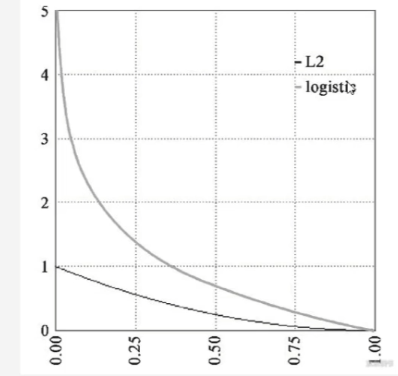

在pytorch中,使用`nn.BCELoss()` 来计算二元交叉熵（Binary Cross Entrophy）


In [3]:
import torch
from torch import nn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### 读取数据

In [10]:
data = pd.read_csv('./dataset/credit-a.csv',header=None)

In [11]:
data.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


由于数据没有表头，那就指定没有表头header=None

In [12]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       653 non-null    int64  
 1   1       653 non-null    float64
 2   2       653 non-null    float64
 3   3       653 non-null    int64  
 4   4       653 non-null    int64  
 5   5       653 non-null    int64  
 6   6       653 non-null    int64  
 7   7       653 non-null    float64
 8   8       653 non-null    int64  
 9   9       653 non-null    int64  
 10  10      653 non-null    int64  
 11  11      653 non-null    int64  
 12  12      653 non-null    int64  
 13  13      653 non-null    int64  
 14  14      653 non-null    float64
 15  15      653 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 81.8 KB


In [13]:
data.duplicated().sum()

0

In [14]:
data.isnull().sum() 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [15]:
X = data.iloc[:,:-1]

In [16]:
Y = data.iloc[:,-1]

In [18]:
Y.unique() 

array([-1,  1], dtype=int64)

因为希望分为两列,分别用0和1来表示,所以这里要修改

In [30]:
Y = data.iloc[:,-1].replace(-1,0)

In [31]:
Y.unique() 

array([0, 1], dtype=int64)

In [22]:
X = torch.from_numpy(X.values).type(torch.float32)

In [23]:
X

tensor([[0.0000e+00, 3.0830e+01, 0.0000e+00,  ..., 0.0000e+00, 2.0200e+02,
         0.0000e+00],
        [1.0000e+00, 5.8670e+01, 4.4600e+00,  ..., 0.0000e+00, 4.3000e+01,
         5.6000e+02],
        [1.0000e+00, 2.4500e+01, 5.0000e-01,  ..., 0.0000e+00, 2.8000e+02,
         8.2400e+02],
        ...,
        [1.0000e+00, 2.5250e+01, 1.3500e+01,  ..., 0.0000e+00, 2.0000e+02,
         1.0000e+00],
        [0.0000e+00, 1.7920e+01, 2.0500e-01,  ..., 0.0000e+00, 2.8000e+02,
         7.5000e+02],
        [0.0000e+00, 3.5000e+01, 3.3750e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [38]:
X.size() 

torch.Size([653, 15])

In [36]:
Y = torch.from_numpy(Y.values.reshape(-1,1)).type(torch.float32)

In [37]:
Y.size()

torch.Size([653, 1])

## 模型创建与训练

#### 创建模型

In [39]:
model = nn.Sequential(
    nn.Linear(15,1), #特征有15列，目标输出值(0,1)只有一列，所以是15,1
    nn.Sigmoid() #sigmoid激活,所谓激活其实就是将其转换一下,不必深究过多
)

In [40]:
model

Sequential(
  (0): Linear(in_features=15, out_features=1, bias=True)
  (1): Sigmoid()
)

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### 初始化损失函数 

##### 用二元交叉熵 

In [44]:
loss_fn = nn.BCELoss()

#### 定义优化函数

In [42]:
opti = torch.optim.Adam(model.parameters(),lr=0.001)

#### 使用batch(批次)训练

In [43]:
batches = 16
no_batch = 653//16 #653条数据,一个批次16个,共需要653//16个批次

#### 训练

In [ ]:
epoches = 1000 
for epoch in range(epoches):
    for i in range(no_batch): 
        start = i*batches 
        #第一个批次开始是0，结束是16,第二个轮次开始是16,结束是32
        end = start+batches
        x = X[start:end]
        y = Y[start:end]
        y_pred = model(x) 
        loss = loss_fn(y_pred,y)
        opti.zero_grad() #将梯度置为0  
        loss.backward() #反向传播
        opti.step() 

In [46]:
model.to(device)
epoches = 1000 
for epoch in range(epoches):
    for i in range(no_batch): 
        start = i*batches 
        #第一个批次开始是0，结束是16,第二个轮次开始是16,结束是32
        end = start+batches
        # 将数据移至与模型相同的设备（CPU或GPU）
        x = X[start:end].to(device)
        y = Y[start:end].to(device)
        y_pred = model(x) 
        loss = loss_fn(y_pred,y)
        opti.zero_grad() #将梯度置为0  
        loss.backward() #反向传播
        opti.step()
print('训练完毕')

训练完毕


In [48]:
model.state_dict() #sigmoid(w1*x1+w2*x2+....w15*x15 + b)

OrderedDict([('0.weight',
              tensor([[-2.9511e-01, -8.3137e-03,  3.6278e-02,  2.6042e-01,  2.8834e-01,
                       -4.9912e-03,  2.0638e-01, -1.5504e-01,  4.4870e+00,  3.1545e-01,
                       -1.4360e-01, -2.8144e-01, -2.2423e-01,  2.1739e-03,  9.9011e-05]],
                     device='cuda:0')),
             ('0.bias', tensor([-0.5281], device='cuda:0'))])

15个weights对应15个变量，还有一个bias(偏置)的值

In [49]:
(model(X).data.numpy() > 0.5).astype('int') #将布尔值转换成0和1

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [50]:
# 如果X是一个PyTorch张量，也需要将其移动到与model相同的设备上
if isinstance(X, torch.Tensor):
    X = X.to(device)

# 执行预测并将结果转换回CPU再转换为numpy数组（因为numpy不支持GPU张量）
with torch.no_grad():  # 在推理模式下禁用梯度计算可以减少内存占用并加快计算速度
    predictions = model(X)
    predictions = predictions.cpu().data.numpy()  # 先将张量移回CPU，然后转为numpy数组

# 将输出转换为0和1
output = (predictions > 0.5).astype('int')

In [51]:
output

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [52]:
output == Y.numpy() #判断预测值与实际值是否相同

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [

#### 计算准确率

In [53]:
(output == Y.numpy()).mean()

0.8499234303215927

#### 保存模型

In [54]:
import pickle
with open('mymodel/logisticr.pkl','wb+') as f:
    pickle.dump(model,f)

#### 调用模型做预测

##  多层感知器

单层神经元的缺陷  
神经元要求数据必须是线性可分的  
异或问题无法找到一条直线分割两个类  
这个问题使得神经网络的发展停滞了许多年  


### 案例

#### 二分类问题,预测离职

#### 导包

In [1]:
import torch
import numpy as np 
import pandas as pd 
from torch import nn
import matplotlib.pyplot as plt

#### 读取数据

In [2]:
data = pd.read_csv('./dataset/HR.csv')

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   part                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


##### 查看是否有重复值

In [4]:
data.duplicated().sum() 

3008

In [5]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

#### 去除重复值

In [6]:
data = data.drop_duplicates(keep='last')

In [7]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 783 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   part                   11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,salary
783,0.36,0.46,2,132,3,0,1,0,sales,low
784,0.44,0.57,2,131,3,0,1,0,sales,low
785,0.85,0.99,5,248,5,0,1,0,sales,low
786,0.78,0.93,5,225,5,0,1,0,sales,low
787,0.39,0.46,2,156,3,0,1,0,sales,low


##### 查看都有哪些部门

In [11]:
data.part.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

##### 查看收入水平

In [12]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

##### 我们要将这些东西数值化,因为文本是无法放入机器学习或深度学习中进行计算的

##### 按照薪资和部门来进行分组,查看各个部门薪资分布状况

In [14]:
data.groupby(['salary','part']).size()

salary  part       
high    IT               71
        RandD            47
        accounting       63
        hr               38
        management      128
        marketing        62
        product_mng      52
        sales           237
        support         126
        technical       166
low     IT              476
        RandD           322
        accounting      296
        hr              296
        management      139
        marketing       310
        product_mng     343
        sales          1553
        support         867
        technical      1138
medium  IT              429
        RandD           325
        accounting      262
        hr              267
        management      169
        marketing       301
        product_mng     291
        sales          1449
        support         828
        technical       940
dtype: int64

接下来利用pandas提供的get_dummies方法将这些东西数值化,将数据转换成独热编码

#### 独热编码

In [19]:
data.join(pd.get_dummies(data.salary).astype('int'))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,salary,high,low,medium
783,0.36,0.46,2,132,3,0,1,0,sales,low,0,1,0
784,0.44,0.57,2,131,3,0,1,0,sales,low,0,1,0
785,0.85,0.99,5,248,5,0,1,0,sales,low,0,1,0
786,0.78,0.93,5,225,5,0,1,0,sales,low,0,1,0
787,0.39,0.46,2,156,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


##### 操作原数据

In [20]:
data = data.join(pd.get_dummies(data.salary).astype('int'))
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,salary,high,low,medium
783,0.36,0.46,2,132,3,0,1,0,sales,low,0,1,0
784,0.44,0.57,2,131,3,0,1,0,sales,low,0,1,0
785,0.85,0.99,5,248,5,0,1,0,sales,low,0,1,0
786,0.78,0.93,5,225,5,0,1,0,sales,low,0,1,0
787,0.39,0.46,2,156,3,0,1,0,sales,low,0,1,0


##### 删除掉原来的salary

In [21]:
del data['salary']

In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,high,low,medium
783,0.36,0.46,2,132,3,0,1,0,sales,0,1,0
784,0.44,0.57,2,131,3,0,1,0,sales,0,1,0
785,0.85,0.99,5,248,5,0,1,0,sales,0,1,0
786,0.78,0.93,5,225,5,0,1,0,sales,0,1,0
787,0.39,0.46,2,156,3,0,1,0,sales,0,1,0


##### 同样的方式操作部门

In [23]:
pd.get_dummies(data.part)

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
783,False,False,False,False,False,False,False,True,False,False
784,False,False,False,False,False,False,False,True,False,False
785,False,False,False,False,False,False,False,True,False,False
786,False,False,False,False,False,False,False,True,False,False
787,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,True,False
14995,False,False,False,False,False,False,False,False,True,False
14996,False,False,False,False,False,False,False,False,True,False
14997,False,False,False,False,False,False,False,False,True,False


In [24]:
data = data.join(pd.get_dummies(data.part).astype('int'))

In [25]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,high,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
783,0.36,0.46,2,132,3,0,1,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
784,0.44,0.57,2,131,3,0,1,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
785,0.85,0.99,5,248,5,0,1,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
786,0.78,0.93,5,225,5,0,1,0,sales,0,...,0,0,0,0,0,0,0,1,0,0
787,0.39,0.46,2,156,3,0,1,0,sales,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
del data['part']

In [27]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
783,0.36,0.46,2,132,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
784,0.44,0.57,2,131,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
785,0.85,0.99,5,248,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
786,0.78,0.93,5,225,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
787,0.39,0.46,2,156,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [28]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
783,0.36,0.46,2,132,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
784,0.44,0.57,2,131,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
785,0.85,0.99,5,248,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
786,0.78,0.93,5,225,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
787,0.39,0.46,2,156,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


我们的目的是构建一个模型预测一个人会不会离职,即`left`这一列是否为1

In [29]:
data.left.value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

那么我们需要关注,没离职的有10000个，我们可以粗略的计算未离职的概率大概有

In [30]:
10000/11991

0.8339588024351597

也就是说我们预测不离职的要高于这个粗略计算的概率才对

#### 开始构建数据

##### 取出目标值

In [31]:
Y_data = data.left.values.reshape(-1,1)
Y_data

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

将其转换为张量

In [37]:
Y = torch.from_numpy(Y_data).type(torch.float32)

构建X,取出除`left`这一列的所有列,还有就是用.values将其转换为numpy数组

In [34]:
X_data = data[[c for c in data.columns if c != 'left']].values

In [36]:
X = torch.from_numpy(X_data).type(torch.float32)

In [38]:
X

tensor([[0.3600, 0.4600, 2.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4400, 0.5700, 2.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.8500, 0.9900, 5.0000,  ..., 1.0000, 0.0000, 0.0000],
        ...,
        [0.3700, 0.5300, 2.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.1100, 0.9600, 6.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.3700, 0.5200, 2.0000,  ..., 0.0000, 1.0000, 0.0000]])

In [39]:
Y

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

### 创建模型

自定义模型  
让其继承与nn.Model  
\_\_init\_\_:初始化所有的层   
forward: 定义模型的运算过程(前向传播)

In [41]:
nn.Linear??

Init signature:
nn.Linear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    device=None,
    dtype=None,
) -> None
Source:        
class Linear(Module):
    r"""Applies an affine linear transformation to the incoming data: :math:`y = xA^T + b`.

    This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

    On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

    Args:
        in_features: size of each input sample
        out_features: size of each output sample
        bias: If set to ``False``, the layer will not learn an additive bias.
            Default: ``True``

    Shape:
        - Input: :math:`(*, H_\text{in})` where :math:`*` means any number of
          dimensions including none and :math:`H_\text{in} = \text{in\_features}`.
        - Output: :math:`(*, H_\text{out})` where all but the last dimension
          are the same shape as the input and :math:`H_\text{out} = \t

In [50]:
class Mymodel(nn.Module): 
    #初始化方法
    def __init__(self):
        super().__init__() #继承父类所有的属性
        #初始化第一层,公有20个特征,假设有64个中间层
        self.liner_1 = nn.Linear(in_features=20,out_features=64)
        #第二层的输入是第一层的输出
        self.liner_2 = nn.Linear(in_features=64,out_features=64)
        #第三层,64个输入,1个输出
        self.liner_3 = nn.Linear(64,1)
        #定义激活函数
        self.relu = nn.ReLU()

        #定义sigmoid层 
        self.sigmod = nn.Sigmoid()
    def forward(self,input): #重写前向传播 
        X = self.liner_1(input)
        X = self.relu(X)
        X = self.liner_2(X) #注意第二层的输入是第一层的输出
        X = self.relu(X)
        X = self.liner_3(X)
        X = self.sigmod(X) #最后一个输出是利用sigmoid层
        return X

        
    
    

初始化实例对象

In [54]:
model_old = Mymodel()
model_old

Mymodel(
  (liner_1): Linear(in_features=20, out_features=64, bias=True)
  (liner_2): Linear(in_features=64, out_features=64, bias=True)
  (liner_3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sigmod): Sigmoid()
)

##### nn.functional引入了许多函数式api

这样利用其api可以省去很多步骤

In [11]:
import torch.nn.functional as F

In [ ]:
F.relu(X)

In [44]:
F.linear??

Docstring:
linear(input, weight, bias=None) -> Tensor

Applies a linear transformation to the incoming data: :math:`y = xA^T + b`.

This operation supports 2-D :attr:`weight` with :ref:`sparse layout<sparse-docs>`


.. warning::
    Sparse support is a beta feature and some layout(s)/dtype/device combinations may not be supported,
    or may not have autograd support. If you notice missing functionality please
    open a feature request.

This operator supports :ref:`TensorFloat32<tf32_on_ampere>`.

Shape:

    - Input: :math:`(*, in\_features)` where `*` means any number of
      additional dimensions, including none
    - Weight: :math:`(out\_features, in\_features)` or :math:`(in\_features)`
    - Bias: :math:`(out\_features)` or :math:`()`
    - Output: :math:`(*, out\_features)` or :math:`(*)`, based on the shape of the weight
Type:      builtin_function_or_method

#### 改写

In [12]:
class MYodel(nn.Module): 
    #初始化方法
    def __init__(self):
        super().__init__() #继承父类所有的属性
        #初始化第一层,公有20个特征,假设有64个中间层
        self.liner_1 = nn.Linear(in_features=20,out_features=64)
        #第二层的输入是第一层的输出
        self.liner_2 = nn.Linear(in_features=64,out_features=64)
        #第三层,64个输入,1个输出
        self.liner_3 = nn.Linear(64,1)
       
    def forward(self,input): #重写前向传播 
        X = self.liner_1(input)
        X = F.relu(X)
        X = self.liner_2(X) #注意第二层的输入是第一层的输出
        X = F.relu(X)
        X = self.liner_3(X)
        X = F.sigmoid(X) #最后一个输出是利用sigmoid层
        return X


In [62]:
model = MYodel()
model

MYodel(
  (liner_1): Linear(in_features=20, out_features=64, bias=True)
  (liner_2): Linear(in_features=64, out_features=64, bias=True)
  (liner_3): Linear(in_features=64, out_features=1, bias=True)
)

#### 定义学习率

In [13]:
lr = 0.0001

#### 定义一个方法封装模型的创建以及训练流程

In [14]:
def get_model():
    model = MYodel() 
    optm = torch.optim.Adam(model.parameters(),lr=lr) 
    return model,optm

In [65]:
model,optim = get_model()  #这样就可以拿到模型和优化方法

#### 定义损失函数

In [16]:
loss_fn = nn.BCELoss() #创建二元交叉熵损失函数

#### 定义批次和批量以及轮次

In [17]:
batch = 64
no_of_batches = len(data)//batch
epochs = 100

In [ ]:
for epoch in range(epochs):
    for i in range(no_of_batches): 
        start = i*batch
        end = start+batch
        x = X[start:end]
        y = Y[start:end]
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward() 
        optim.step()
        

In [78]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
loss_lst = []
for epoch in range(epochs):
    for i in range(no_of_batches): 
        start = i*batch
        end = start+batch
        x = X[start:end].to(device)
        y = Y[start:end].to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward() 
        optim.step()
    #我们也可以在这里写计算损失值,这样在每个epoch之后都能看到损失的下降
    # 注意这一步不需要梯度计算,所以要写到无torch梯度计算里
    with torch.no_grad():
        loss_ = loss_fn(model(X.to(device)),Y.to(device)).data.item()
        loss_lst.append(loss_)
        print(f'轮次>>:{epoch}损失:{loss_}')
print('训练结束')
print(loss_lst)

轮次>>:0损失:0.4052344560623169
轮次>>:1损失:0.4049396216869354
轮次>>:2损失:0.4042876064777374
轮次>>:3损失:0.4042927324771881
轮次>>:4损失:0.4032483398914337
轮次>>:5损失:0.4030953049659729
轮次>>:6损失:0.402446985244751
轮次>>:7损失:0.4021434187889099
轮次>>:8损失:0.40150687098503113
轮次>>:9损失:0.4011865556240082
轮次>>:10损失:0.4007284641265869
轮次>>:11损失:0.40027672052383423
轮次>>:12损失:0.3999204933643341
轮次>>:13损失:0.39936473965644836
轮次>>:14损失:0.3989703953266144
轮次>>:15损失:0.3985992670059204
轮次>>:16损失:0.3980938792228699
轮次>>:17损失:0.3978034257888794
轮次>>:18损失:0.3972110450267792
轮次>>:19损失:0.3967640995979309
轮次>>:20损失:0.3964434266090393
轮次>>:21损失:0.395929217338562
轮次>>:22损失:0.3957158029079437
轮次>>:23损失:0.39503780007362366
轮次>>:24损失:0.39487987756729126
轮次>>:25损失:0.39413464069366455
轮次>>:26损失:0.3940194547176361
轮次>>:27损失:0.3933023512363434
轮次>>:28损失:0.39323145151138306
轮次>>:29损失:0.39250198006629944
轮次>>:30损失:0.3922983407974243
轮次>>:31损失:0.3915809690952301
轮次>>:32损失:0.3996846377849579
轮次>>:33损失:0.428973525762558
轮次>>:34损失:0.4051699

#### 计算损失值

In [75]:
loss_fn(model(X.to(device)),Y.to(device))

tensor(0.4059, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)

In [77]:
import pickle 
with open('./mymodel/mymodel0.pkl','wb+') as f:
    pickle.dump(model,f)

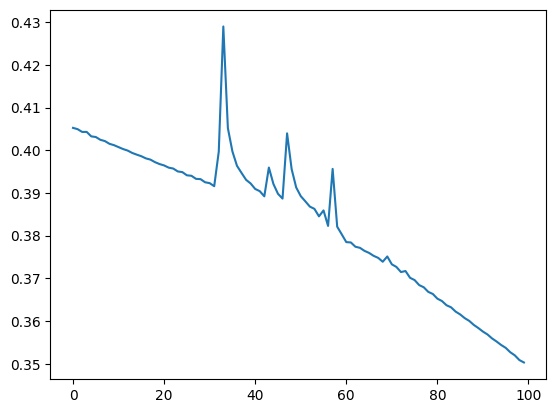

In [80]:
plt.plot([i for i in range(100)],loss_lst)

In [ ]:
# 如果X是一个PyTorch张量，也需要将其移动到与model相同的设备上
if isinstance(X, torch.Tensor):
    X = X.to(device)

# 执行预测并将结果转换回CPU再转换为numpy数组（因为numpy不支持GPU张量）
with torch.no_grad():  # 在推理模式下禁用梯度计算可以减少内存占用并加快计算速度
    predictions = model(X)
    predictions = predictions.cpu().data.numpy()  # 先将张量移回CPU，然后转为numpy数组

# 将输出转换为0和1
output = (predictions > 0.5).astype('int')

### 使用DataSet和DataLoader加载数据

#### 使用DataSet重构数据

之前对于数据的切片其实非常不方便,pytorch为我们提供了DataSet类

#### 导入TensorDataset

In [2]:
from torch.utils.data import TensorDataset

我们可以用其包装张量,将其包装成dataset,然后就不用写俩切片了

In [3]:
data = pd.read_csv('./dataset/HR.csv').drop_duplicates(keep='last')
data = data.join(pd.get_dummies(data.salary).astype('int')) 
data = data.join(pd.get_dummies(data.part).astype('int')) 
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
783,0.36,0.46,2,132,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
784,0.44,0.57,2,131,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
785,0.85,0.99,5,248,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
786,0.78,0.93,5,225,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
787,0.39,0.46,2,156,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


In [4]:
del data['part']

In [5]:
del data['salary']

data.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
783,0.36,0.46,2,132,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
784,0.44,0.57,2,131,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
785,0.85,0.99,5,248,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
786,0.78,0.93,5,225,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
787,0.39,0.46,2,156,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
Y_data = data.left.values.reshape(-1,1) 
Y = torch.from_numpy(Y_data).type(torch.float32) 
X_data = data[[c for c in data.columns if c != 'left']].values 
X = torch.from_numpy(X_data).type(torch.float32)

#### 包装张量数据

In [7]:
HRdataset = TensorDataset(X,Y)

In [8]:
HRdataset

In [9]:
len(HRdataset)

11991

In [10]:
HRdataset[0]

(tensor([  0.3600,   0.4600,   2.0000, 132.0000,   3.0000,   0.0000,   0.0000,
           0.0000,   1.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   1.0000,   0.0000,   0.0000]),
 tensor([1.]))

##### 输出的就是X,还有Y的第1条数据,返回的是两部分,由两个张量元组构成

In [15]:
model,optim = get_model()

#### 修改原来的代码

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
loss_lst = []
for epoch in range(epochs):
    for i in range(no_of_batches): 
        # start = i*batch
        # end = start+batch
        x,y = HRdataset[i*batch:i*batch+batch].to(device)
        # x = X[start:end].to(device)
        # y = Y[start:end].to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward() 
        optim.step()
    #我们也可以在这里写计算损失值,这样在每个epoch之后都能看到损失的下降
    # 注意这一步不需要梯度计算,所以要写到无torch梯度计算里
    with torch.no_grad():
        loss_ = loss_fn(model(X.to(device)),Y.to(device)).data.item()
        loss_lst.append(loss_)
        print(f'轮次>>:{epoch}损失:{loss_}')
print('训练结束')
print(loss_lst)

虽说上面的确实减少了很多代码量,但是以机器学习的经验,我们希望关注的是数据量  
而非数据顺序本身,就像之前的划分训练集和测试集也要以同数量但不同顺序这样就能  
使模型有更好的泛化能力  
所以,引出了DataLoader

#### DataLoader

In [18]:
from torch.utils.data import DataLoader

##### 首先还是用Dataset来创建

In [19]:
HR_dataset = TensorDataset(X,Y) 

##### 然后用DataLoader为Dataset对象创建批次

In [20]:
DataLoader??

Init signature:
DataLoader(
    dataset: torch.utils.data.dataset.Dataset[+_T_co],
    batch_size: Optional[int] = 1,
    shuffle: Optional[bool] = None,
    sampler: Union[torch.utils.data.sampler.Sampler, collections.abc.Iterable, NoneType] = None,
    batch_sampler: Union[torch.utils.data.sampler.Sampler[list], collections.abc.Iterable[list], NoneType] = None,
    num_workers: int = 0,
    collate_fn: Optional[Callable[[list[~_T]], Any]] = None,
    pin_memory: bool = False,
    drop_last: bool = False,
    timeout: float = 0,
    worker_init_fn: Optional[Callable[[int], NoneType]] = None,
    multiprocessing_context=None,
    generator=None,
    *,
    prefetch_factor: Optional[int] = None,
    persistent_workers: bool = False,
    pin_memory_device: str = '',
    in_order: bool = True,
)
Source:        
class DataLoader(Generic[_T_co]):
    r"""
    Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

    The :class:`~torch.utils.data.Dat

可以指定batch_size,也可以指定shuffle来乱序数据  
值得注意的是,当我们指定了batch_size之后,我们不用关注no_of_batches了  
因为DataLoader会帮我们处理

In [21]:
HR_DLR = DataLoader(HR_dataset,batch_size=batch,shuffle=True)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
loss_lst = []
for epoch in range(epochs):
    for x,y in HR_DLR:
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward() 
        optim.step()
    #我们也可以在这里写计算损失值,这样在每个epoch之后都能看到损失的下降
    # 注意这一步不需要梯度计算,所以要写到无torch梯度计算里
    with torch.no_grad():
        loss_ = loss_fn(model(X.to(device)),Y.to(device)).data.item()
        loss_lst.append(loss_)
        print(f'轮次>>:{epoch}损失:{loss_}')
print('训练结束')
print(loss_lst)

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 提前将验证用的数据放到GPU上
X_val = X.to(device)
Y_val = Y.to(device)

loss_lst = []

for epoch in range(epochs):
    model.train()  # 设置为训练模式
    for x, y in HR_DLR:
        x = x.to(device)
        y = y.to(device)
        
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        
        optim.zero_grad()
        loss.backward()
        optim.step()

    # 每个epoch结束后评估模型
    model.eval()  # 设置为评估模式
    with torch.no_grad():
        y_pred_val = model(X_val)
        loss_ = loss_fn(y_pred_val, Y_val).item()
        loss_lst.append(loss_)
        print(f'轮次 >> {epoch} | 损失: {loss_:.6f}')

print('训练结束')
print(loss_lst)

轮次 >> 0 | 损失: 0.467534
轮次 >> 1 | 损失: 0.466296
轮次 >> 2 | 损失: 0.464408
轮次 >> 3 | 损失: 0.458031
轮次 >> 4 | 损失: 0.454105
轮次 >> 5 | 损失: 0.455555
轮次 >> 6 | 损失: 0.443608
轮次 >> 7 | 损失: 0.449168
轮次 >> 8 | 损失: 0.434316
轮次 >> 9 | 损失: 0.428882
轮次 >> 10 | 损失: 0.422961
轮次 >> 11 | 损失: 0.414276
轮次 >> 12 | 损失: 0.408475
轮次 >> 13 | 损失: 0.407678
轮次 >> 14 | 损失: 0.399035
轮次 >> 15 | 损失: 0.391161
轮次 >> 16 | 损失: 0.386183
轮次 >> 17 | 损失: 0.376858
轮次 >> 18 | 损失: 0.369895
轮次 >> 19 | 损失: 0.363639
轮次 >> 20 | 损失: 0.358223
轮次 >> 21 | 损失: 0.353986
轮次 >> 22 | 损失: 0.346329
轮次 >> 23 | 损失: 0.344335
轮次 >> 24 | 损失: 0.335903
轮次 >> 25 | 损失: 0.330958
轮次 >> 26 | 损失: 0.326618
轮次 >> 27 | 损失: 0.322050
轮次 >> 28 | 损失: 0.319912
轮次 >> 29 | 损失: 0.311357
轮次 >> 30 | 损失: 0.306779
轮次 >> 31 | 损失: 0.303477
轮次 >> 32 | 损失: 0.299589
轮次 >> 33 | 损失: 0.299454
轮次 >> 34 | 损失: 0.293490
轮次 >> 35 | 损失: 0.289276
轮次 >> 36 | 损失: 0.285618
轮次 >> 37 | 损失: 0.285702
轮次 >> 38 | 损失: 0.283355
轮次 >> 39 | 损失: 0.277027
轮次 >> 40 | 损失: 0.274648
轮次 >> 41 | 损失: 0.272240
轮次

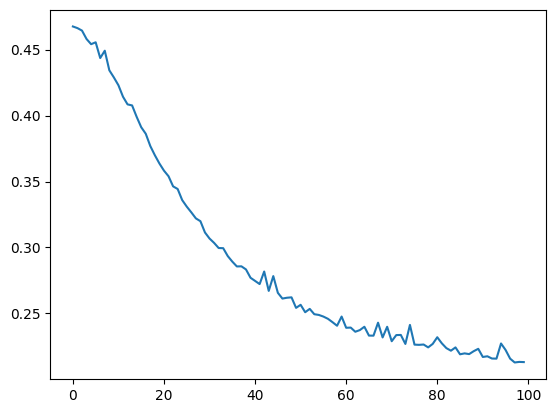

In [23]:
plt.plot([i for i in range(100)],loss_lst)

In [24]:
import pickle 
with open('./mymodel/mymodel1.pkl','wb+') as f:
    pickle.dump(model,f)

## 划分验证数据和验证集

像之前的机器学习一样,要对数据集划分来了解模型对于未知数据的泛化能力  
如果只是一味的在整个数据集上训练,那么必然会有高精度的模型,但是这是  
过拟合现象,接下来要划分训练集测试集验证集等  

### 切分数据来作为验证

In [1]:
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('./dataset/HR.csv').drop_duplicates(keep='last')
data = data.join(pd.get_dummies(data.salary).astype('int')) 
data = data.join(pd.get_dummies(data.part).astype('int')) 
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,salary,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
783,0.36,0.46,2,132,3,0,1,0,sales,low,0,1,0,0,0,0,0,0,0,0,1,0,0
784,0.44,0.57,2,131,3,0,1,0,sales,low,0,1,0,0,0,0,0,0,0,0,1,0,0
785,0.85,0.99,5,248,5,0,1,0,sales,low,0,1,0,0,0,0,0,0,0,0,1,0,0
786,0.78,0.93,5,225,5,0,1,0,sales,low,0,1,0,0,0,0,0,0,0,0,1,0,0
787,0.39,0.46,2,156,3,0,1,0,sales,low,0,1,0,0,0,0,0,0,0,0,1,0,0


In [6]:
del data['salary']

In [7]:
del data['part']

In [8]:
data.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
783,0.36,0.46,2,132,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
784,0.44,0.57,2,131,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
785,0.85,0.99,5,248,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
786,0.78,0.93,5,225,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
787,0.39,0.46,2,156,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [9]:
Y_data = data.left.values.reshape(-1,1) 
Y = torch.from_numpy(Y_data).type(torch.float32) 
X_data = data[[c for c in data.columns if c != 'left']].values 
X = torch.from_numpy(X_data).type(torch.float32)

#### 如果不指定,那就默认按照0.75,0.25划分train和test

In [13]:
train_x,test_x,train_y,test_y = train_test_split(X_data,Y_data)

输出训练集和测试集对应的形状

In [15]:
train_x.shape,test_x.shape

((8993, 20), (2998, 20))

In [16]:
train_y.shape,test_y.shape

((8993, 1), (2998, 1))

#### 二八开划分数据

In [17]:
train_x,test_x,train_y,test_y = train_test_split(X_data,Y_data,train_size=0.8)

In [19]:
type(train_x)

numpy.ndarray

可以看到还是ndarry，我们要将其转换为张量，都要转换

In [22]:
train_x = torch.from_numpy(train_x).type(torch.float32)
train_y = torch.from_numpy(train_y).type(torch.float32)
test_x = torch.from_numpy(test_x).type(torch.float32)
test_y = torch.from_numpy(test_y).type(torch.float32)

In [18]:
from torch.utils.data import TensorDataset,DataLoader

#### 构建训练集DataLoader 

In [28]:
Train_DS = TensorDataset(train_x,train_y) 
Train_DL = DataLoader(Train_DS,batch_size=64,shuffle=True)

#### 构建测试集的DataLoader

注意,测试数据没必要做shuffle,训练数据做shuffle是为了防止批次和过  
拟合之间有相关性所以做了乱序

In [29]:
Test_DS = TensorDataset(test_x,test_y)  
Test_DL = DataLoader(Test_DS,batch_size=64)

#### 定义计算正确率的方法

In [33]:
def acc_get(y_pred,y):  
    y_pred = (y_pred>0.5).type(torch.int32)
    acc = (y_pred == y).float().mean()
    return acc  

In [26]:
import torch.nn.functional as F

In [27]:
class MYodel(nn.Module): 
    #初始化方法
    def __init__(self):
        super().__init__() #继承父类所有的属性
        #初始化第一层,公有20个特征,假设有64个中间层
        self.liner_1 = nn.Linear(in_features=20,out_features=64)
        #第二层的输入是第一层的输出
        self.liner_2 = nn.Linear(in_features=64,out_features=64)
        #第三层,64个输入,1个输出
        self.liner_3 = nn.Linear(64,1)
       
    def forward(self,input): #重写前向传播 
        X = self.liner_1(input)
        X = F.relu(X)
        X = self.liner_2(X) #注意第二层的输入是第一层的输出
        X = F.relu(X)
        X = self.liner_3(X)
        X = F.sigmoid(X) #最后一个输出是利用sigmoid层
        return X

In [30]:
lr = 0.001

In [31]:
def get_model():
    model = MYodel() 
    optm = torch.optim.Adam(model.parameters(),lr=lr) 
    return model,optm

In [32]:
model,optim = get_model()

#### 训练集开训

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
epochs = 100
loss_fn = nn.BCELoss()
# 提前将验证用的数据放到GPU上
X_val = train_x.to(device)
Y_val = train_y.to(device)

loss_lst = []

for epoch in range(epochs):
    model.train()  # 设置为训练模式
    for x, y in Train_DL:
        x = x.to(device)
        y = y.to(device)
        
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        
        optim.zero_grad()
        loss.backward()
        optim.step()

    # 每个epoch结束后评估模型
    model.eval()  # 设置为评估模式
    with torch.no_grad():
        y_pred_val = model(X_val)
        epoch_acc= acc_get(y_pred_val,Y_val).item() #加上item()将张量转换为第标量
        
        loss_ = loss_fn(y_pred_val, Y_val).item()
        loss_lst.append(loss_)
        print(f'轮次 >> {epoch} | 损失: {loss_:.6f} | 轮次平均正确率:{epoch_acc:.6f}')

print('训练结束')
print(loss_lst)

轮次 >> 0 | 损失: 0.084200 | 轮次平均正确率:0.977481
轮次 >> 1 | 损失: 0.096694 | 轮次平均正确率:0.969349
轮次 >> 2 | 损失: 0.089304 | 轮次平均正确率:0.974666
轮次 >> 3 | 损失: 0.102616 | 轮次平均正确率:0.966326
轮次 >> 4 | 损失: 0.092872 | 轮次平均正确率:0.971018
轮次 >> 5 | 损失: 0.097810 | 轮次平均正确率:0.970809
轮次 >> 6 | 损失: 0.092484 | 轮次平均正确率:0.972373
轮次 >> 7 | 损失: 0.093617 | 轮次平均正确率:0.974875
轮次 >> 8 | 损失: 0.096100 | 轮次平均正确率:0.974145
轮次 >> 9 | 损失: 0.104634 | 轮次平均正确率:0.964658
轮次 >> 10 | 损失: 0.094730 | 轮次平均正确率:0.972790
轮次 >> 11 | 损失: 0.088894 | 轮次平均正确率:0.972164
轮次 >> 12 | 损失: 0.087748 | 轮次平均正确率:0.974458
轮次 >> 13 | 损失: 0.095109 | 轮次平均正确率:0.970288
轮次 >> 14 | 损失: 0.085033 | 轮次平均正确率:0.976439
轮次 >> 15 | 损失: 0.098536 | 轮次平均正确率:0.970600
轮次 >> 16 | 损失: 0.088103 | 轮次平均正确率:0.972790
轮次 >> 17 | 损失: 0.097933 | 轮次平均正确率:0.968515
轮次 >> 18 | 损失: 0.081865 | 轮次平均正确率:0.976334
轮次 >> 19 | 损失: 0.091906 | 轮次平均正确率:0.972373
轮次 >> 20 | 损失: 0.106047 | 轮次平均正确率:0.966222
轮次 >> 21 | 损失: 0.089917 | 轮次平均正确率:0.973520
轮次 >> 22 | 损失: 0.088150 | 轮次平均正确率:0.972894
轮次 >> 23 | 损失: 0.0915

#### 打印出在测试数据上的准确率

In [41]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
epochs = 100
loss_fn = nn.BCELoss()
# 提前将验证用的数据放到GPU上
X_val = train_x.to(device)
Y_val = train_y.to(device)
X_test = test_x.to(device)
Y_test = test_y.to(device)
loss_lst = []
for epoch in range(epochs):
    model.train()  # 设置为训练模式
    for x, y in Train_DL:
        x = x.to(device)
        y = y.to(device)
        
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        
        optim.zero_grad()
        loss.backward()
        optim.step()

    # 每个epoch结束后评估模型
    model.eval()  # 设置为评估模式
    with torch.no_grad():
        y_pred_val = model(X_val)
        epoch_acc= acc_get(y_pred_val,Y_val).item() #加上item()将张量转换为第标量
        
        loss_ = loss_fn(y_pred_val, Y_val).item()
        loss_lst.append(loss_)

        y_pred_val_tst = model(X_test)
        epochtest_acc= acc_get(y_pred_val_tst,Y_test).item() #加上item()将张量转换为第标量
        
        losstest_ = loss_fn(y_pred_val_tst, Y_test).item()
        
        print(f'轮次 >> {epoch} | 损失: {loss_:.3f} | 轮次平均正确率:{epoch_acc:.3f}  \
        | 测试集损失:{losstest_:.3f} | 测试集准确率:{epochtest_acc:.3f}')

print('训练结束')
print(loss_lst)

轮次 >> 0 | 损失: 0.081 | 轮次平均正确率:0.975          | 测试集损失:0.131 | 测试集准确率:0.965
轮次 >> 1 | 损失: 0.091 | 轮次平均正确率:0.972          | 测试集损失:0.128 | 测试集准确率:0.965
轮次 >> 2 | 损失: 0.083 | 轮次平均正确率:0.977          | 测试集损失:0.120 | 测试集准确率:0.969
轮次 >> 3 | 损失: 0.079 | 轮次平均正确率:0.977          | 测试集损失:0.120 | 测试集准确率:0.969
轮次 >> 4 | 损失: 0.079 | 轮次平均正确率:0.977          | 测试集损失:0.111 | 测试集准确率:0.965
轮次 >> 5 | 损失: 0.084 | 轮次平均正确率:0.975          | 测试集损失:0.115 | 测试集准确率:0.965
轮次 >> 6 | 损失: 0.084 | 轮次平均正确率:0.975          | 测试集损失:0.105 | 测试集准确率:0.970
轮次 >> 7 | 损失: 0.076 | 轮次平均正确率:0.978          | 测试集损失:0.112 | 测试集准确率:0.971
轮次 >> 8 | 损失: 0.088 | 轮次平均正确率:0.975          | 测试集损失:0.112 | 测试集准确率:0.967
轮次 >> 9 | 损失: 0.097 | 轮次平均正确率:0.970          | 测试集损失:0.129 | 测试集准确率:0.960
轮次 >> 10 | 损失: 0.082 | 轮次平均正确率:0.974          | 测试集损失:0.125 | 测试集准确率:0.965
轮次 >> 11 | 损失: 0.084 | 轮次平均正确率:0.976          | 测试集损失:0.126 | 测试集准确率:0.969
轮次 >> 12 | 损失: 0.075 | 轮次平均正确率:0.979          | 测试集损失:0.103 | 测试集准确率:0.972
轮次 >> 13 | 损失: 0.081 | 轮次平均正确率:0.97

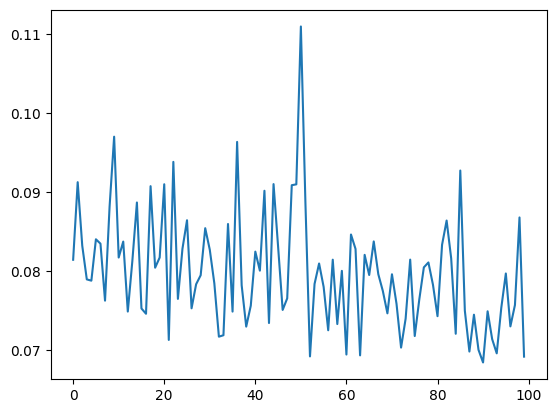

In [42]:
plt.plot([i for i in range(100)],loss_lst)